In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
def calc_cumulative_explained_variance(singular_values):
    explained_variance = singular_values**2
    total_variance = explained_variance.sum()
    explained_variance_ratio = explained_variance / total_variance
    cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
    return cumulative_explained_variance_ratio

## Dispersion decomposition

In [7]:
image_path = "/home/python/projects/course_work/image_compress/images/nature.png"
image = Image.open(image_path)

image_array = np.array(image)

red_channel = image_array[:,:,0]
green_channel = image_array[:,:,1]
blue_channel = image_array[:,:,2]

U_r, s_r, Vt_r = np.linalg.svd(red_channel)
U_g, s_g, Vt_g = np.linalg.svd(green_channel)
U_b, s_b, Vt_b = np.linalg.svd(blue_channel)

In [8]:
k = 10 # compression ratio
red_channel_reduced = np.dot(U_r[:,:k], np.dot(np.diag(s_r[:k]), Vt_r[:k,:]))
green_channel_reduced = np.dot(U_g[:,:k], np.dot(np.diag(s_g[:k]), Vt_g[:k,:]))
blue_channel_reduced = np.dot(U_b[:,:k], np.dot(np.diag(s_b[:k]), Vt_b[:k,:]))

reduced_image_array = np.stack((red_channel_reduced, green_channel_reduced, blue_channel_reduced), axis=-1)

reduced_image = Image.fromarray(reduced_image_array.astype('uint8'))
reduced_image.save("result.png")

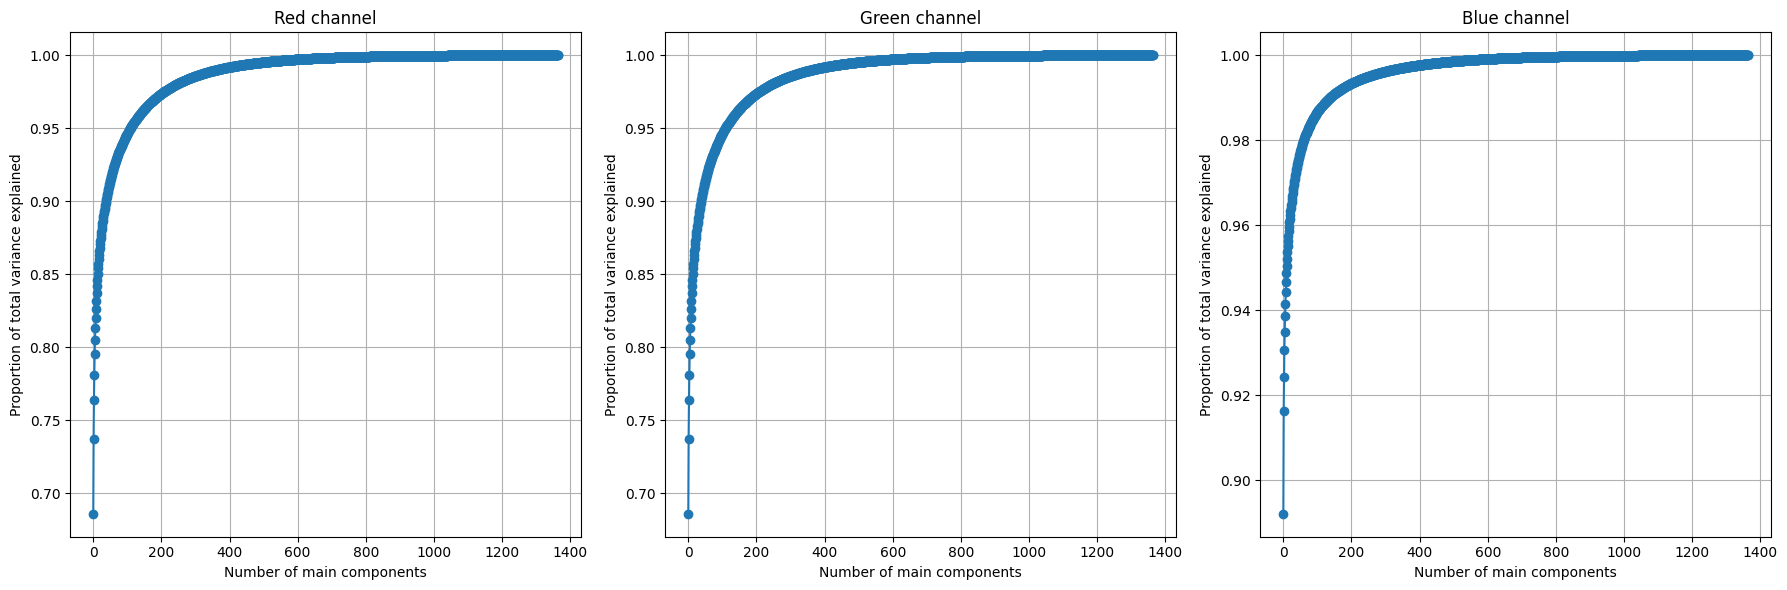

In [11]:
labels = ['Red channel', 'Green channel', 'Blue channel']

cumulative_variances = [calc_cumulative_explained_variance(sv) for sv in [s_r, s_r, s_b]]

plt.figure(figsize=(18, 6))

for i, cumulative_variance in enumerate(cumulative_variances, start=1):
    plt.subplot(1, 3, i)
    plt.plot(cumulative_variance, marker='o')
    plt.xlabel('Number of main components')
    plt.ylabel('Proportion of total variance explained')
    plt.title(labels[i-1])
    plt.grid(True)

plt.tight_layout()
plt.show()
